# Unsupervised Model
tipe model yang tidak memerlukan target

kita berikan data

lalu dia akan olah

contoh model unsupervised:
1. Clustering
2. PCA

## Clustering
teknik dimana data yang sudah kita berikan dikelompokkan ke beberapa kelompok

## PCA
teknik dimana data yang sudah kita berikan dicampur dan menjadi data baru dengan dimensi yang lebih kecil

---

# Clustering

Kita akan pelajari algoritma `K-Means Clustering` mengelompokkan/ clustering data ke sejumlah k kelompok menggunakan rata-rata means
1. pilih mau berapa kelompok k
2. algoritma memilih k titik sebagai centroid (titik tengah per kelompok)
3. semua titik data lainnya menjadi kelompok centroid terdekat
4. hitung ulang lokasi centroid per kelompok dari seluruh data yang ada di dalam kelompok tersebut
5. kita balik ke step 3 untuk mengulangi pengelompokkan data setiap titik. setiap titik adalah milik kelompok centroid terdekat. lanjut, kita ke step 4 lagi untuk menghitung ulang posisi centroid yang baru. terus berulang sampai:
  - kita mencapai limit perulangan (misalkan kita set ke max 300 kali mengulang)
  - centroid tidak pindah tempat, titik data tidak ada yang pindah kelompok

In [ ]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
# import data
# kita gunakan data credit card customer
df_cc = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Credit%20Card%20Customer%20Data.csv")
df_cc.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# kita ambil 2 fitur, misalnya Avg_Credit_Limit dan Total_Credit_Cards
df_at = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']].dropna()
df_at.head()

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6


In [ ]:
df_at.isnull().sum()

Avg_Credit_Limit      0
Total_Credit_Cards    0
dtype: int64

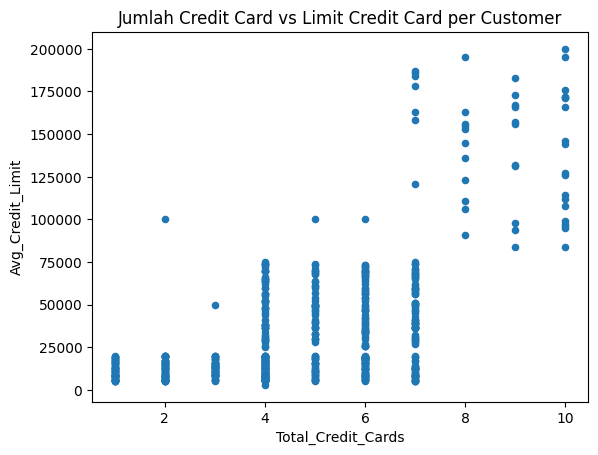

In [ ]:
# plot secara visual
df_at.plot(kind="scatter", x="Total_Credit_Cards", y="Avg_Credit_Limit")
plt.title("Jumlah Credit Card vs Limit Credit Card per Customer")
plt.show()

In [ ]:
# buat model dan latih model
model_kmc_cc = KMeans(n_clusters=8)
model_kmc_cc.fit(df_at)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
# kita bisa minta inertia model Clustering yang kita buat
model_kmc_cc.inertia_

12601004803.164322

In [ ]:
# buat copy data asli
df_at2 = df_at.copy()

In [ ]:
# gunakan model untuk mengelompokkan data
df_at2['kelompok'] = model_kmc_cc.predict(df_at)
df_at2.head()

,Avg_Credit_Limit,Total_Credit_Cards,kelompok
0,100000,2,1
1,50000,3,2
2,50000,7,2
3,30000,5,4
4,100000,6,1


In [ ]:
# kita bisa minta centroid model kita dengan cluster_centers_
model_kmc_cc.cluster_centers_

array([[1.64863388e+04, 3.76502732e+00],
       [1.06210526e+05, 8.42105263e+00],
       [5.18714286e+04, 5.51428571e+00],
       [1.52588235e+05, 8.58823529e+00],
       [3.45952381e+04, 5.64285714e+00],
       [8.33653846e+03, 3.68269231e+00],
       [1.82461538e+05, 8.76923077e+00],
       [6.88939394e+04, 5.62121212e+00]])

In [ ]:
# kita bisa lihat setiap kelompok ada berapa banyak data
df_at2.groupby('kelompok').count()

,Avg_Credit_Limit,Total_Credit_Cards
kelompok,,
0,183,183
1,19,19
2,70,70
3,17,17
4,84,84
5,208,208
6,13,13
7,66,66


In [ ]:
# kita bisa lihat juga statistik deskriptif per kelompok
df_at2[df_at2['kelompok'] == 0].describe()

,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,183.000000,183.000000,183.0
mean,16486.338798,3.765027,0.0
std,2422.100450,1.810980,0.0
min,13000.000000,1.000000,0.0
25%,14000.000000,2.000000,0.0
50%,17000.000000,4.000000,0.0
75%,19000.000000,5.000000,0.0
max,25000.000000,7.000000,0.0


In [ ]:
for k in range(8):
  print('kelompok', k)
  display(df_at2[df_at2['kelompok'] == k].describe())
  print("---------------------------------")

kelompok 0


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,183.000000,183.000000,183.0
mean,16486.338798,3.765027,0.0
std,2422.100450,1.810980,0.0
min,13000.000000,1.000000,0.0
25%,14000.000000,2.000000,0.0
50%,17000.000000,4.000000,0.0
75%,19000.000000,5.000000,0.0
max,25000.000000,7.000000,0.0


---------------------------------
kelompok 1


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,19.000000,19.000000,19.0
mean,106210.526316,8.421053,1.0
std,11487.089117,2.168353,0.0
min,91000.000000,2.000000,1.0
25%,97500.000000,8.000000,1.0
50%,100000.000000,9.000000,1.0
75%,113000.000000,10.000000,1.0
max,127000.000000,10.000000,1.0


---------------------------------
kelompok 2


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,70.000000,70.000000,70.0
mean,51871.428571,5.514286,2.0
std,4815.197645,1.163987,0.0
min,44000.000000,3.000000,2.0
25%,48000.000000,4.250000,2.0
50%,51000.000000,6.000000,2.0
75%,56000.000000,6.750000,2.0
max,60000.000000,7.000000,2.0


---------------------------------
kelompok 3


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,17.000000,17.000000,17.0
mean,152588.235294,8.588235,3.0
std,11731.681591,0.939336,0.0
min,131000.000000,7.000000,3.0
25%,145000.000000,8.000000,3.0
50%,156000.000000,9.000000,3.0
75%,163000.000000,9.000000,3.0
max,167000.000000,10.000000,3.0


---------------------------------
kelompok 4


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,84.000000,84.000000,84.0
mean,34595.238095,5.642857,4.0
std,4641.663203,1.147473,0.0
min,26000.000000,4.000000,4.0
25%,30750.000000,5.000000,4.0
50%,36000.000000,6.000000,4.0
75%,38000.000000,7.000000,4.0
max,43000.000000,7.000000,4.0


---------------------------------
kelompok 5


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,208.000000,208.000000,208.0
mean,8336.538462,3.682692,5.0
std,2169.666048,1.932506,0.0
min,3000.000000,1.000000,5.0
25%,6000.000000,2.000000,5.0
50%,8000.000000,4.000000,5.0
75%,10000.000000,5.000000,5.0
max,12000.000000,7.000000,5.0


---------------------------------
kelompok 6


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,13.000000,13.000000,13.0
mean,182461.538462,8.769231,6.0
std,9828.660341,1.363442,0.0
min,171000.000000,7.000000,6.0
25%,173000.000000,7.000000,6.0
50%,183000.000000,9.000000,6.0
75%,187000.000000,10.000000,6.0
max,200000.000000,10.000000,6.0


---------------------------------
kelompok 7


,Avg_Credit_Limit,Total_Credit_Cards,kelompok
count,66.000000,66.000000,66.0
mean,68893.939394,5.621212,7.0
std,4697.393018,1.333188,0.0
min,61000.000000,4.000000,7.0
25%,65250.000000,4.000000,7.0
50%,69000.000000,6.000000,7.0
75%,71750.000000,7.000000,7.0
max,84000.000000,10.000000,7.0


---------------------------------


kelompok 0


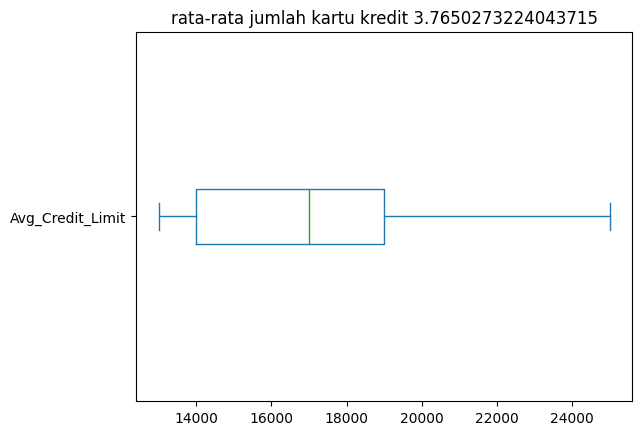

---------------------------------
kelompok 1


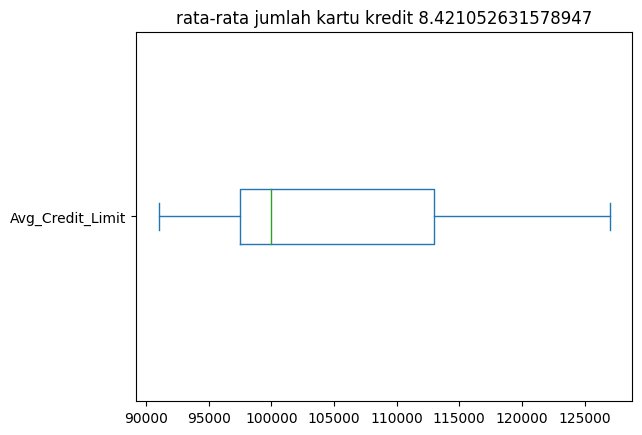

---------------------------------
kelompok 2


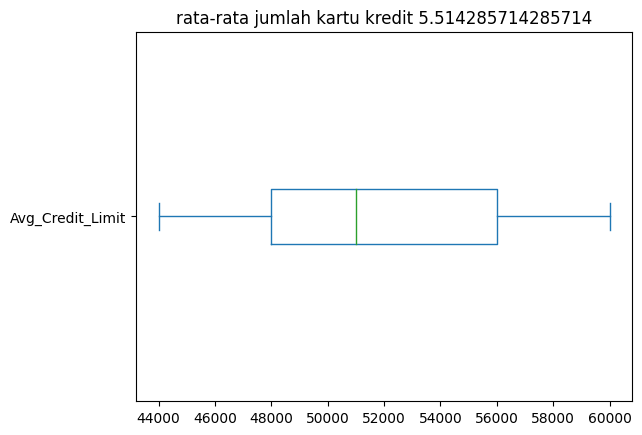

---------------------------------
kelompok 3


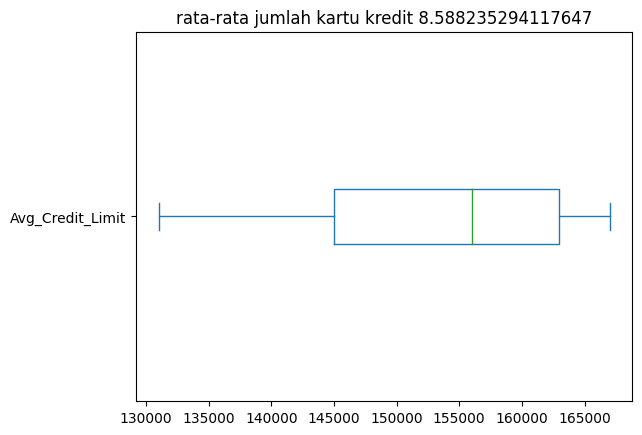

---------------------------------
kelompok 4


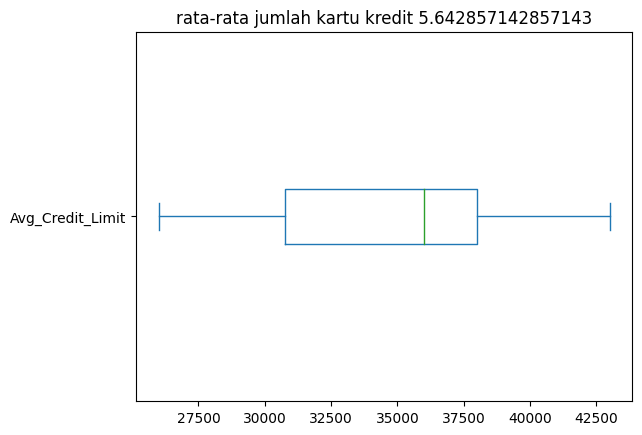

---------------------------------
kelompok 5


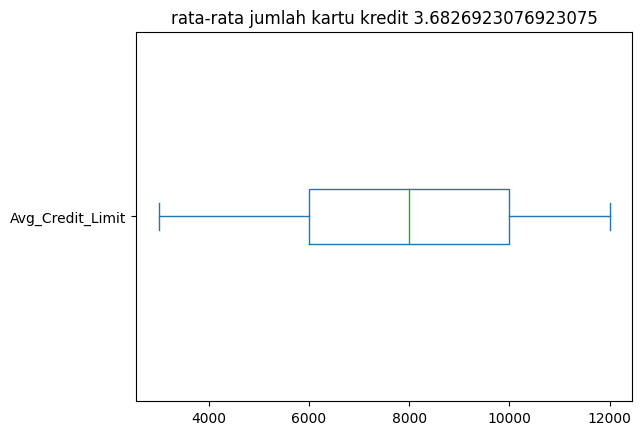

---------------------------------
kelompok 6


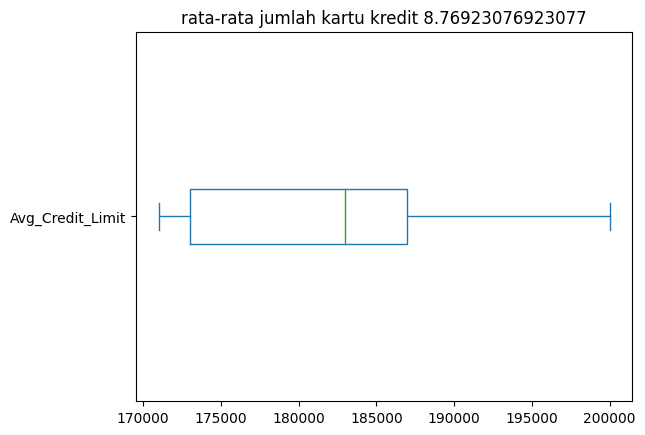

---------------------------------
kelompok 7


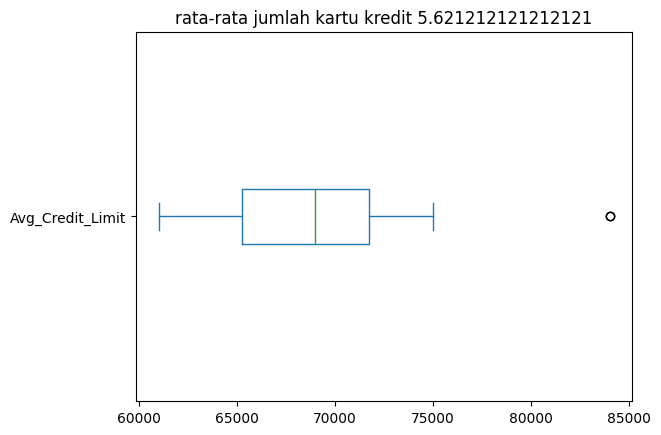

---------------------------------


In [ ]:
# bisa minta data yang lebih visual
for k in range(8):
  print('kelompok', k)
  data = df_at2[df_at2['kelompok'] == k]
  data['Avg_Credit_Limit'].plot(kind="box", vert=False)
  plt.title("rata-rata jumlah kartu kredit " + str(data['Total_Credit_Cards'].mean()))
  plt.show()
  print("---------------------------------")

In [ ]:
# elbow method
# membantu menentukan jumlah